In [1]:
# Generalized Linear Model - Binomial

In [2]:
%matplotlib inline
from __future__ import print_function
import numpy as np
import statsmodels.api as sm
from scipy import stats
from matplotlib import pyplot as plt

In [3]:
# GLM: Binomial response data

In [ ]:
# load data

In [5]:
print(sm.datasets.star98.NOTE)

::

    Number of Observations - 303 (counties in California).

    Number of Variables - 13 and 8 interaction terms.

    Definition of variables names::

        NABOVE   - Total number of students above the national median for the
                   math section.
        NBELOW   - Total number of students below the national median for the
                   math section.
        LOWINC   - Percentage of low income students
        PERASIAN - Percentage of Asian student
        PERBLACK - Percentage of black students
        PERHISP  - Percentage of Hispanic students
        PERMINTE - Percentage of minority teachers
        AVYRSEXP - Sum of teachers' years in educational service divided by the
                number of teachers.
        AVSALK   - Total salary budget including benefits divided by the number
                   of full-time teachers (in thousands)
        PERSPENK - Per-pupil spending (in thousands)
        PTRATIO  - Pupil-teacher ratio.
        PCTAF    - Percenta

In [6]:
data = sm.datasets.star98.load()
data.exog = sm.add_constant(data.exog, prepend=False)

In [ ]:
# The dependent variable is N by 2 (Success: NABOVE, Failure: NBELOW):

In [7]:
print(data.endog[:5,:])

[[452. 355.]
 [144.  40.]
 [337. 234.]
 [395. 178.]
 [  8.  57.]]


In [ ]:
# # The independent variables include all the other variables described above, as well as the interaction terms:

In [8]:
print(data.exog[:2,:])

[[3.43973000e+01 2.32993000e+01 1.42352800e+01 1.14111200e+01
  1.59183700e+01 1.47064600e+01 5.91573200e+01 4.44520700e+00
  2.17102500e+01 5.70327600e+01 0.00000000e+00 2.22222200e+01
  2.34102872e+02 9.41688110e+02 8.69994800e+02 9.65065600e+01
  2.53522420e+02 1.23819550e+03 1.38488985e+04 5.50403520e+03
  1.00000000e+00]
 [1.73650700e+01 2.93283800e+01 8.23489700e+00 9.31488400e+00
  1.36363600e+01 1.60832400e+01 5.95039700e+01 5.26759800e+00
  2.04427800e+01 6.46226400e+01 0.00000000e+00 0.00000000e+00
  2.19316851e+02 8.11417560e+02 9.57016600e+02 1.07684350e+02
  3.40406090e+02 1.32106640e+03 1.30502233e+04 6.95884680e+03
  1.00000000e+00]]


In [9]:
# Fit and summary

In [10]:
glm_binom = sm.GLM(data.endog, data.exog, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           ['y1', 'y2']   No. Observations:                  303
Model:                            GLM   Df Residuals:                      282
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2998.6
Date:                Thu, 14 Feb 2019   Deviance:                       4078.8
Time:                        11:32:53   Pearson chi2:                 4.05e+03
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0168      0.000    -38.749      0.000      -0.018      -0.016
x2             0.0099      0.001     16.505      0.0

In [ ]:
# Quantities of interest

In [11]:
print('Total number of trials:',  data.endog[0].sum())
print('Parameters: ', res.params)
print('T-values: ', res.tvalues)

Total number of trials: 807.0
Parameters:  [-1.68150366e-02  9.92547661e-03 -1.87242148e-02 -1.42385609e-02
  2.54487173e-01  2.40693664e-01  8.04086739e-02 -1.95216050e+00
 -3.34086475e-01 -1.69022168e-01  4.91670212e-03 -3.57996435e-03
 -1.40765648e-02 -4.00499176e-03 -3.90639579e-03  9.17143006e-02
  4.89898381e-02  8.04073890e-03  2.22009503e-04 -2.24924861e-03
  2.95887793e+00]
T-values:  [-38.74908321  16.50473627 -25.1821894  -32.81791308   8.49827113
   4.21247925   5.7749976   -6.16191078  -5.45321673  -5.16865445
   3.92119964 -15.87825999  -7.39093058  -8.44963886  -4.05916246
   6.3210987    6.57434662   5.36229044   7.42806363  -6.44513698
   1.91301155]


In [12]:
# First differences: We hold all explanatory variables constant at their means and manipulate the percentage of 
# low income households to assess its impact on the response variables:
means = data.exog.mean(axis=0)
means25 = means.copy()
means25[0] = stats.scoreatpercentile(data.exog[:,0], 25)
means75 = means.copy()
means75[0] = lowinc_75per = stats.scoreatpercentile(data.exog[:,0], 75)
resp_25 = res.predict(means25)
resp_75 = res.predict(means75)
diff = resp_75 - resp_25

In [ ]:
# The interquartile first difference for the percentage of low income households in a school district is:

In [13]:
print("%2.4f%%" % (diff*100))

-11.8753%


In [14]:
# plots

In [15]:
nobs = res.nobs
y = data.endog[:,0]/data.endog.sum(1)
yhat = res.mu

In [17]:
data.endog.sum(1).shape

(303,)

In [19]:
data.endog[:, 0].shape

(303,)

In [20]:
# plot yhat vs y :

In [21]:
from statsmodels.graphics.api import abline_plot

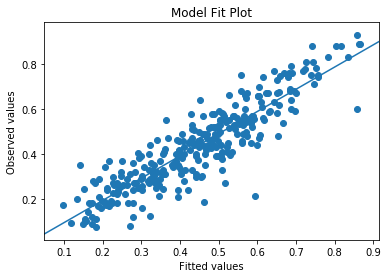

In [22]:
fig, ax = plt.subplots()
ax.scatter(yhat, y)
line_fit = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)


ax.set_title('Model Fit Plot')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');

In [23]:
# plot yhat vs pearson residuals

Text(0.5,0,'Fitted values')

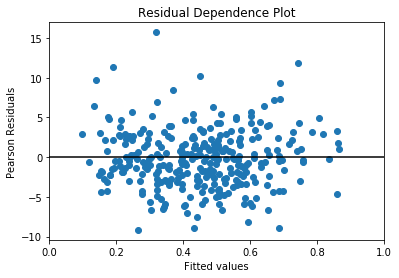

In [24]:
fig, ax = plt.subplots()

ax.scatter(yhat, res.resid_pearson)
ax.hlines(0, 0, 1)
ax.set_xlim(0, 1)
ax.set_title('Residual Dependence Plot')
ax.set_ylabel('Pearson Residuals')
ax.set_xlabel('Fitted values')

In [25]:
# Histogram of standardized deviance residuals:

Text(0.5,1,'Histogram of standardized deviance residuals')

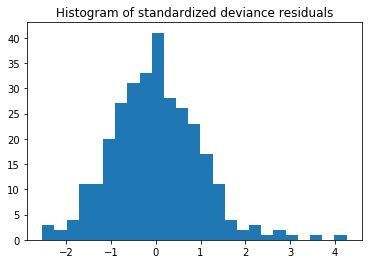

In [26]:
from scipy import stats

fig, ax = plt.subplots()

resid = res.resid_deviance.copy()
resid_std = stats.zscore(resid)
ax.hist(resid_std, bins=25)
ax.set_title('Histogram of standardized deviance residuals')

In [ ]:
# QQ Plot of Deviance Residuals:

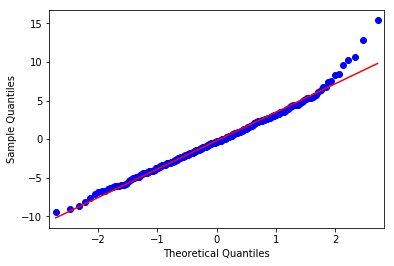

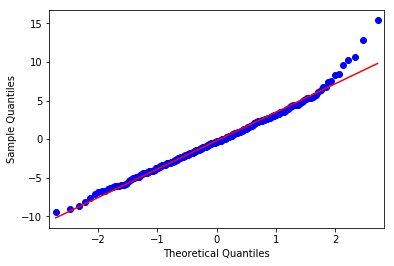

In [27]:
from statsmodels import graphics
graphics.gofplots.qqplot(resid, line='r')

In [ ]:
# https://www.statsmodels.org/stable/examples/notebooks/generated/glm.html#Plots